In [3]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\uber.csv.zip")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.shape

(200000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
#claculating the distance between the pickup and drop co-ordinates
#using haversine formula for accuracy
def haversine(lon_1,lon_2,lat_1,lat_2):
    lon_1,lon_2,lat_1,lat_2=map(np.radians,[lon_1,lon_2,lat_1,lat_2])
    diff_lon=lon_2-lon_1
    diff_lat=lat_2-lat_1
    km=2*6371*np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2+np.cos(lat_1)*np.cos(lat_2)*np.sin(diff_lat/2.0)**2))
    return km
#find distance travelled per ride
df['Distance']=haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])
#round it to 2 decimal point
df['Distance']=df['Distance'].astype(float).round(2)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2.11
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,3.08
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,4.45
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.74
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2.39


Text(0, 0.5, 'fare_amount')

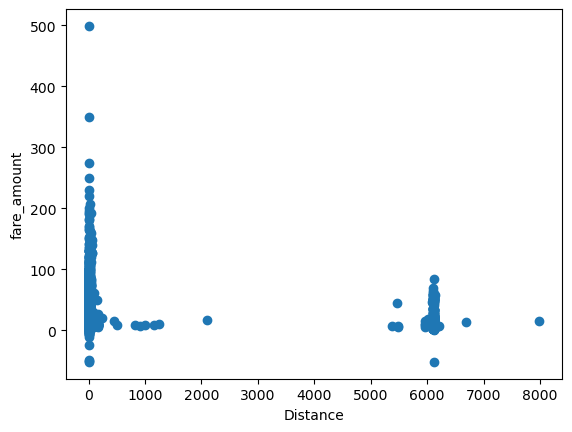

In [19]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")
            

In [25]:
#outliers
#We can get rid of the trips with very large distances that are outlers as well as the trips with 0 distances
df.drop(df[df['Distance'] > 60 ] .index,inplace=True)
df.drop(df[df['Distance']==0].index,inplace=True)
df.drop(df[df['fare_amount']==0].index,inplace=True)
df.drop(df[df['fare_amount']<0].index,inplace=True)

In [27]:
df.shape

(193280, 10)

In [31]:
#removing rows with nonplausible fare amount and distance travelled
df.drop(df[(df['fare_amount']>100)&(df['Distance']<1)].index,inplace=True)
df.drop(df[(df['fare_amount']<100)&(df['Distance']>100)].index,inplace=True)

In [33]:
df.shape

(193270, 10)

Text(0, 0.5, 'fare_amount')

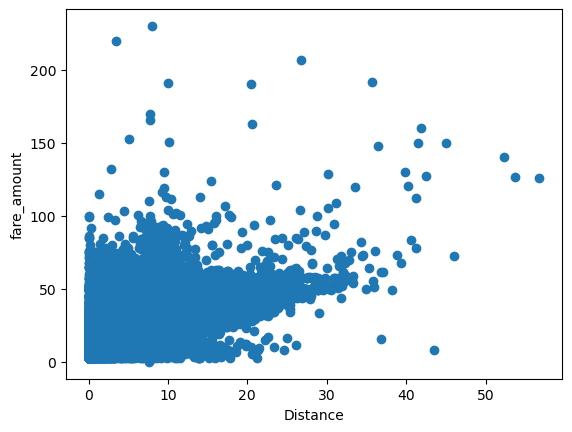

In [39]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('fare_amount')

In [45]:
#Create new dataframe of specific column
df2=pd.DataFrame().assign(fare=df['fare_amount'],Distance=df['Distance'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193270 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fare      193270 non-null  float64
 1   Distance  193270 non-null  float64
dtypes: float64(2)
memory usage: 4.4 MB


In [47]:
df2.shape

(193270, 2)

In [49]:
#independant variable
x=df2['fare'].values.reshape(-1,1)
#Dependant variable
y=df2['Distance'].values.reshape(-1,1)

In [51]:
#scale by standard scalar
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
x_std = std.fit_transform(x)

In [53]:
y_std

array([[-0.27754094],
       [ 0.0246974 ],
       [ 0.4515701 ],
       ...,
       [ 1.84435915],
       [ 0.37055776],
       [ 1.18379701]])

In [55]:
x_std

array([[-0.40104736],
       [-0.38002846],
       [ 0.16646288],
       ...,
       [ 2.05816369],
       [ 0.33461407],
       [ 0.29257627]])

In [57]:
#split in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [59]:
#simple linear regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, Y_train)

LinearRegression()

In [61]:
#predict the tesst values
y_pred = l_reg.predict(X_test)
from sklearn import metrics
print('MAE:' , metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:' , metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R2:' , metrics.r2_score(Y_test, y_pred))

MAE: 0.4523800258100944
MSE: 0.5038466095713261
RMSE: 0.709821533606389
R2: 0.5080604540025863


In [63]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()
rfrmodel.fit(X_train, Y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()